In [1]:
import kpss_py3 as stemmer
import string
import numpy as np
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import nltk
import dutch_words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\01din\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Change paths sorry
private_scrape = pd.read_excel("C:/Users/01din/Desktop/data APG/scrape_results/private_scrape_results.xlsx")
public_scrape = pd.read_excel("C:/Users/01din/Desktop/data APG/scrape_results/public_scrape_results.xlsx")

In [16]:
from nltk.corpus import stopwords
#Gettings document values, and replace nan values with a space
private_corpus = private_scrape.paragraph.tolist()
public_corpus = public_scrape.paragraph.tolist()
#Combine into 1 list
corpus = private_corpus + public_corpus
#Words that need to be removed, consist of stopwords in dutch and the months
#TODO: some docs are in english
dutch_stopwords = stopwords.words('dutch')
months = ['Januari', "Februari", "April", "Mei", "Juni", "Juli", "Augustus", "September", "Oktober", "November", "December", 'januari', "februari", "april", "mei", "juni", "juli", "augustus", "september", "oktober", "november", "december"]
words_to_remove = dutch_stopwords + months

['de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was', 'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat', 'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij', 'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog', 'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel', 'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja', 'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf', 'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere', 'Januari', 'Februari', 'April', 'Mei', 'Juni', 'Juli', 'Augustus', 'September', 'Oktober', 'November', 'December', 'januari', 'februari', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']


In [17]:
#Pass the docsuments and the words that must be removed

def stem(word):
    stemmed_word = stemmer.stem(word)
    if stemmed_word == word:
        #do stemming - get rid of common suffixes
        word = word
    return stemmed_word
def clean_documents(corpus, words_to_remove):
    for i in range(len(corpus)):
        #Retrieve the doc and convert to str (some issues with NANs)
        doc = str(corpus[i])
        doc = doc.replace("á", "a").replace("é", "e").replace("è", "e").replace("ó", "o").replace("ò", "o").replace("í", "i")
        #Split into list of words
        words = doc.split()
        cleaned_doc = []
        #Remove words in words_to_remove set
        for word in words:
            word = word.lower()
            if word[-2:] == "xD":
                word = word[:-2]
            if word not in words_to_remove:
                cleaned_doc.append(word)
        #Join words list back into one string
        cleaned_doc = " ".join(cleaned_doc)
        #Remove punctuation
        cleaned_doc = cleaned_doc.translate(str.maketrans("", "", (string.punctuation+"’")))
        #Remove numbers
        cleaned_doc = "".join([i for i in cleaned_doc if not i.isdigit()])
        #Remove double spaces
        while "  " in cleaned_doc:
            cleaned_doc = cleaned_doc.replace("  ", " ")
        stemmed_doc = []
        words = cleaned_doc.split()
        #perform stemming
        for word in words:
            word = stem(word)
            stemmed_doc.append(word)
        stemmed_doc = " ".join(stemmed_doc)
        corpus[i] = stemmed_doc
    return corpus
clean_corpus = clean_documents(corpus, words_to_remove)


In [18]:
#This max_df value seems not to give the wished results, if max_df=0.3, only words that appear in <30% of all docs should be considered
vectorizer = TfidfVectorizer(max_df=1.0)
vec_trained = vectorizer.fit_transform(clean_corpus)

In [19]:
'''
cm
cmhf
cms
cnv
cnvccoop
co
'''
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaf', ..., 'üpload', 'światłowod', 'όόk'],
      dtype=object)

In [7]:
vec_trained.shape

(1555, 17257)

1348


(array([994., 365.,  83.,  14.,   5.,   0.,   1.,  26.,   3.,  64.]),
 array([   0. ,  285.3,  570.6,  855.9, 1141.2, 1426.5, 1711.8, 1997.1,
        2282.4, 2567.7, 2853. ]),
 <BarContainer object of 10 artists>)

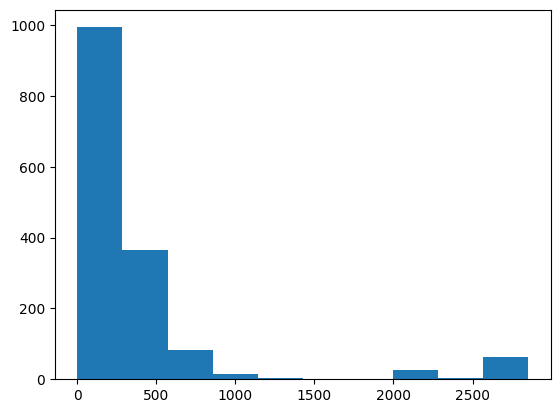

In [8]:
doc_length = []
num_above_10k = 0

largest_doc_index = None
largest_doc_length = -1
for i in range(len(clean_corpus)):
    doc = clean_corpus[i]
    doc_length.append(len(doc.split()))
    if len(doc)>largest_doc_length:
        largest_doc_index=i
        largest_doc_length = len(doc)
    if len(doc)>20000:
        num_above_10k+=1

print(largest_doc_index)
plt.hist(doc_length)
